# Sizing & Drawing of Biosignal Amplifier

**Copyright 2024 Simon Dorrer**

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at
http://www.apache.org/licenses/LICENSE-2.0

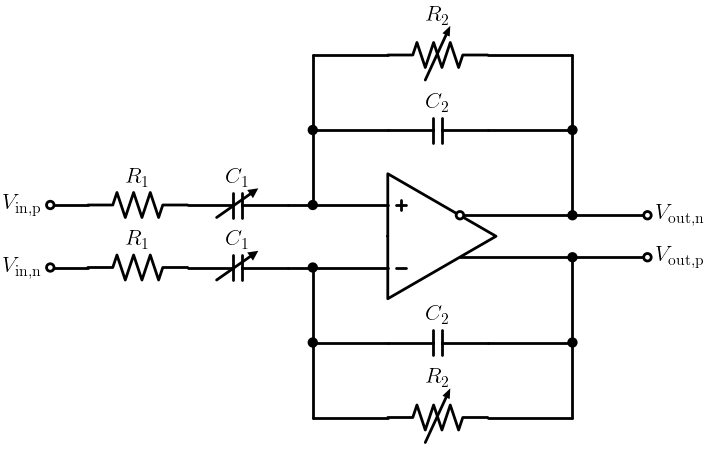

In [26]:
# Draw Capacitive Feedback Amplifier (CFA)
import matplotlib
matplotlib.rcParams.update({
    "text.usetex": True,
    "font.family": "lmodern"
})
import schemdraw as sd
import schemdraw.elements as elm
sd.svgconfig.svg2 = False
with sd.Drawing() as d:
    d.config(unit=2)
    d.config(fontsize=16)
    
    # Upper Side
    elm.Dot(open=True).label('$V_\mathrm{in,p}$', loc='left')
    dot0 = d.here
    elm.Line().right().length(0.75)
    elm.Resistor().label('$R_1$')
    elm.CapacitorVar().label('$C_1$', ofst=-0.175)
    elm.Line().right().length(0.5).dot()
    dot1 = d.here
    d.push()

    elm.Line().right().length(1.5)
    OPA = elm.Opamp().anchor('in2').flip()

    elm.Dot(open=True).at(OPA.n1)
    elm.Line().right().length(2.25).dot()
    dot2 = d.here
    elm.Line().right().length(1.5)
    elm.Dot(open=True).label('$V_\mathrm{out,n}$', loc='right')

    d.pop()
    elm.Line().up().length(1.5).dot()
    d.push()
    elm.Line().right().length(1.5)
    elm.Capacitor().label('$C_2$')
    elm.Line().right().tox(dot2).dot()

    d.pop()
    elm.Line().up().length(1.5)
    elm.Line().right().length(1.5)
    elm.ResistorVar().label('$R_2$', ofst=-0.15)
    elm.Line().right().tox(dot2)
    elm.Line().down().toy(dot2)

    # Go back
    d.here = dot0
    elm.Gap().down().toy(OPA.in1)

    # Lower Side
    elm.Dot(open=True).label('$V_\mathrm{in,n}$', loc='left')
    elm.Line().right().length(0.75)
    elm.Resistor().label('$R_1$')
    elm.CapacitorVar().label('$C_1$', ofst=-0.175)
    elm.Line().right().length(0.5).dot()
    dot1 = d.here
    d.push()

    elm.Line().right().to(OPA.in1)
    elm.Line().at(OPA.n2).right().length(2.25).dot()
    dot2 = d.here
    elm.Line().right().length(1.5)
    elm.Dot(open=True).label('$V_\mathrm{out,p}$', loc='right')

    d.pop()
    elm.Line().down().length(1.5).dot()
    d.push()
    elm.Line().right().length(1.5)
    elm.Capacitor().label('$C_2$')
    elm.Line().right().tox(dot2).dot()

    d.pop()
    elm.Line().down().length(1.5)
    elm.Line().right().length(1.5)
    elm.ResistorVar().label('$R_2$', ofst=-0.15)
    elm.Line().right().tox(dot2)
    elm.Line().up().toy(dot2)

    # Save the schematic
    d.save('figures/biosignal_amplifier/biosignal_amplifier_circuit.svg')
    d.save('figures/biosignal_amplifier/biosignal_amplifier_circuit.pdf')

In [27]:
# Packages
import numpy as np
import matplotlib.pyplot as plt
import math 
import scipy.signal as scs
import scipy.constants as sc
import scipy.integrate as sci
from control.matlab import *

In [28]:
plt.close("all")

# %matplotlib qt
%matplotlib inline

In [29]:
def plot_step_response(b, a, t_start = 0, t_stop = 0.01e-3, t_step = 0.01e-6):
    """ Plot step response of Transfer Function defined by
            b: numerator polynom
            a: denominator polynom
    """
    ltisys = (b, a)
    t = np.r_[t_start:t_stop:t_step]
    t_vec, y_vec = scs.step(ltisys, T=t)
    fig = plt.figure(tight_layout = True)
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(t, y_vec)
    ax.set_title('Step response')
    ax.set_xlabel('$t$ (s)')
    ax.set_ylabel('Amplitude (1)')
    # ax.axis((10, 1000, -100, 10))
    ax.grid(which='both', axis='both')
    plt.show(block=False)

In [30]:
# Function for integration of R_2 thermal noise to input
def noise_spectrum_R2_in(f, T, R_2, f_c2, A_0):
    return (4 * sc.k * T * R_2) / ((f / f_c2)**2 * A_0**2)

In [31]:
# Function for integration of flicker noise to output
def noise_spectrum_flicker_out(f, K, C_1, C_2, R_2):
    return K / f * (1 + f**2 * (2 * np.pi * (C_1 + C_2) * R_2)**2) / (1 + f**2 * (2 * np.pi * C_2 * R_2)**2)

In [32]:
# Variables
T = 300 # Room Temperature in Kelvin
B = 500 # CFA bandwidth

C_1 = np.array([330e-12, 165e-12, 33e-12]) # A_0 = 100 = 40dB / 50 = 34dB / 10 = 20dB
C_2 = 3.3e-12
R_1 = 10e3
R_2 = np.array([320e9, 160e9])  # C = 4fF, fphi = 3.91kHz / 7.81kHz, see sizing_sc_fb_resistor

print('C_1 =', round(float(C_1[0] * 1e12), 2), 'pF /', round(float(C_1[1] * 1e12), 2), 'pF /', round(float(C_1[2] * 1e12), 2), 'pF')
print('C_2 =', round(float(C_2 * 1e12), 2), 'pF')
print('R_1 =', round(float(R_1 * 1e-3), 2), 'kOhm')
print('R_2 =', round(float(R_2[0] * 1e-9), 2), 'GOhm /', round(float(R_2[1] * 1e-9), 2), 'GOhm')

C_1 = 330.0 pF / 165.0 pF / 33.0 pF
C_2 = 3.3 pF
R_1 = 10.0 kOhm
R_2 = 320.0 GOhm / 160.0 GOhm


In [33]:
# Calculation of the low-pass cut-off frequency defined via R_1 and C_1
f_c1 = np.zeros(len(C_1))
for i in range(len(C_1)):
  f_c1[i] = 1 / (2 * np.pi * R_1 * C_1[i])
  print('Low-pass f_c =', round(float(f_c1[i]), 2), 'Hz with C_1 =', round(float(C_1[i] * 1e12), 2), 'pF')

Low-pass f_c = 48228.77 Hz with C_1 = 330.0 pF
Low-pass f_c = 96457.54 Hz with C_1 = 165.0 pF
Low-pass f_c = 482287.71 Hz with C_1 = 33.0 pF


In [34]:
# Calculation of the high-pass cut-off frequency defined via R_2 and C_2
f_c2 = np.zeros(len(R_2))
for i in range(len(R_2)):
  f_c2[i] = 1 / (2 * np.pi * R_2[i] * C_2)
  print('High-pass f_c =', round(float(f_c2[i]), 2), 'Hz with R_2 =', round(float(R_2[i] * 1e-9), 2), 'GOhm')

High-pass f_c = 0.15 Hz with R_2 = 320.0 GOhm
High-pass f_c = 0.3 Hz with R_2 = 160.0 GOhm


In [35]:
# Calculation of the DC gain defined via C_1 and C_2
A_0 = np.zeros(len(C_1))
A_0_dB = np.zeros(len(C_1))
for i in range(len(C_1)):
  A_0[i] = C_1[i] / C_2
  A_0_dB[i] = 20 * np.log10(A_0[i])
  print('A_0 =', round(float(A_0[i]), 2), '/', round(float(A_0_dB[i]), 2), 'dB with C_1 =', round(float(C_1[i] * 1e12), 2), 'pF')

A_0 = 100.0 / 40.0 dB with C_1 = 330.0 pF
A_0 = 50.0 / 33.98 dB with C_1 = 165.0 pF
A_0 = 10.0 / 20.0 dB with C_1 = 33.0 pF


Adc_ol_dB = 80dB
fc_ol = 5Hz
GBWP_ol = 50000.0Hz (min)
It is important to reach the minimum GBWP. In other words, if Adc_ol_dB increases, fc_ol can decrease and vice versa.


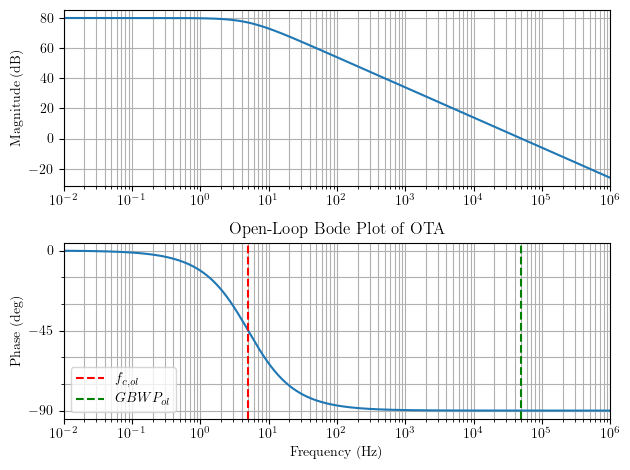

In [36]:
# Plot the estimated open-loop transfer function of the OTA
# It is important to reach the minimum GBWP. In other words, if Adc_ol_dB increases, fc_ol can decrease and vice versa.
f_start = 1e-2
f_end = 1e6
wvec = 2*np.pi*np.logspace(np.log10(f_start), np.log10(f_end), 1001)

Adc_ol_dB = 80
Adc_ol = 10**(Adc_ol_dB/20)
fc_ol = 5 # Hz
wc_ol = 2 * np.pi * fc_ol
GBWP_ol = Adc_ol * fc_ol
print(f"Adc_ol_dB = {Adc_ol_dB}dB")
print(f"fc_ol = {fc_ol}Hz")
print(f"GBWP_ol = {GBWP_ol}Hz (min)")
print("It is important to reach the minimum GBWP. In other words, if Adc_ol_dB increases, fc_ol can decrease and vice versa.")

# Plot Bode Plot
fig1 = plt.figure(tight_layout = True)

b = np.array([0, Adc_ol])
a = np.array([1 / wc_ol, 1])
ol_tf = TransferFunction(b, a)
[mag_ol, phase_ol, wout_ol] = bode(ol_tf, wvec, Hz = True)

# Save data
# Convert into Hz, dB and degrees
wout_ol = [i / (2 * np.pi) for i in wout_ol]
mag_ol = [mag2db(i) for i in mag_ol]
phase_ol = [math.degrees(i) for i in phase_ol]

plt.axvline(fc_ol, color='r', linestyle='--', label="$f_{c,ol}$")
plt.axvline(GBWP_ol, color='g', linestyle='--', label="$GBWP_{ol}$")

plt.title(f"Open-Loop Bode Plot of OTA")
plt.legend()
plt.xlim(f_start, f_end)
plt.show(block = False)
fig1.savefig("figures/biosignal_amplifier/biosignal_amplifier_bode_OTA.svg", bbox_inches='tight')
fig1.savefig("figures/biosignal_amplifier/biosignal_amplifier_bode_OTA.pdf", bbox_inches='tight')
np.savetxt("figures/biosignal_amplifier/biosignal_amplifier_bode_OTA.csv", 
           np.column_stack((wout_ol, mag_ol, phase_ol)), comments = "", 
           header = "wout,mag_ol,phase_ol", delimiter = ",")

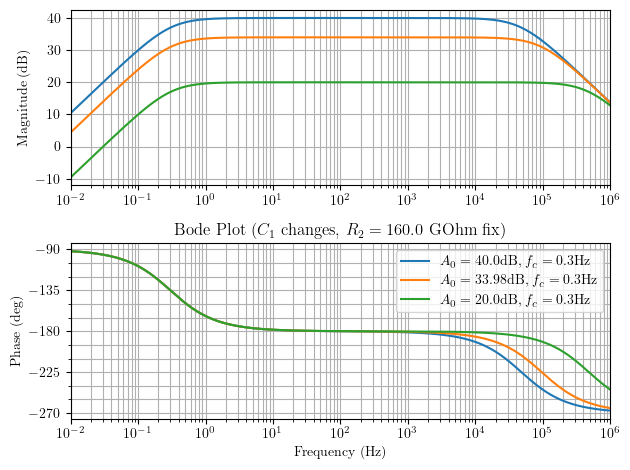

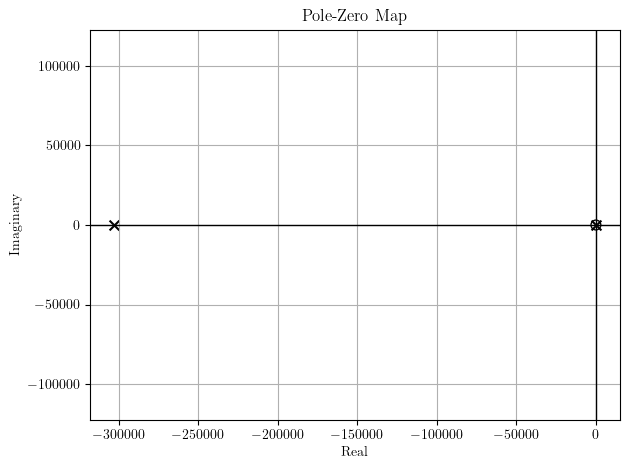

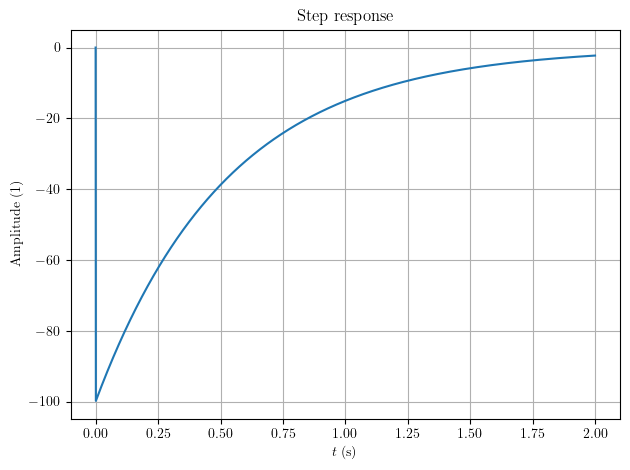

In [37]:
# Plot the transfer function of the Biosignal amplifier for different A_0
f_start = 1e-2
f_end = 1e6
wvec = 2*np.pi*np.logspace(np.log10(f_start), np.log10(f_end), 1001)

# Plot Bode Plot
fig2 = plt.figure(tight_layout = True)

# Different A_0 (C_1 changes, R_2 = 160.0 GOhm fix)
b = np.empty((len(C_1), 2))
a = np.empty((len(C_1), 3))
total_tf = np.empty(len(C_1), dtype=object)
mag_total = np.empty((len(C_1), len(wvec)))
phase_total = np.empty((len(C_1), len(wvec)))
wout_total = np.empty((len(C_1), len(wvec)))
for i in range(len(C_1)):
  # Total transfer function with C_1, R_1, C_2 and R_2
  # H(s) = - R_2 / R_1 * 1 / (1 + s R_2 C_2) * (s R_1 C_1) / (1 + s R_1 C_1)
  b[i] = np.array([- R_2[1] / R_1 * R_1 * C_1[i], 0])
  a[i] = np.array([R_1 * R_2[1] * C_1[i] * C_2, (R_1 * C_1[i] + R_2[1] * C_2), 1])
  total_tf[i] = TransferFunction(b[i], a[i])
  [mag_total[i], phase_total[i], wout_total[i]] = bode(total_tf[i], wvec, Hz = True)

  # Save data
  # Convert into Hz, dB and degrees
  wout_total[i] = [i / (2 * np.pi) for i in wout_total[i]]
  mag_total[i] = [mag2db(i) for i in mag_total[i]]
  phase_total[i] = [math.degrees(i) for i in phase_total[i]]

plt.title(f"Bode Plot ($C_1$ changes, $R_2 = {round(float(R_2[1] * 1e-9), 2)}$ GOhm fix)")
plt.legend([f"$A_0 = {A_0_dB[0]}$dB, $f_c = {round(float(f_c2[1]), 2)}$Hz", f"$A_0 = {round(float(A_0_dB[1]), 2)}$dB, $f_c = {round(float(f_c2[1]), 2)}$Hz", f"$A_0 = {A_0_dB[2]}$dB, $f_c = {round(float(f_c2[1]), 2)}$Hz"])
plt.xlim(f_start, f_end)
plt.show(block = False)
fig2.savefig("figures/biosignal_amplifier/biosignal_amplifier_bode_total_out_in_A0.svg", bbox_inches='tight')
fig2.savefig("figures/biosignal_amplifier/biosignal_amplifier_bode_total_out_in_A0.pdf", bbox_inches='tight')
np.savetxt("figures/biosignal_amplifier/biosignal_amplifier_bode_total_out_in_A0.csv", 
           np.column_stack((wout_total[0], mag_total[0], mag_total[1], mag_total[2], phase_total[0], phase_total[1], phase_total[2])), comments = "", 
           header = "wout,mag_total_0,mag_total_1,mag_total_2,phase_total_0,phase_total_1,phase_total_2", delimiter = ",")

# Plot Pole-Zero Map for C_1 = 330pF and R_2 = 160GOhm
fig3 = plt.figure(tight_layout = True)
pzmap(total_tf[0])
plt.title('Pole-Zero Map')
plt.grid(visible = True)
plt.show(block = False)

# Plot Step response for C_1 = 330pF and R_2 = 160GOhm
plot_step_response(b[0], a[0], t_start = 0, t_stop = 2, t_step = 0.001)

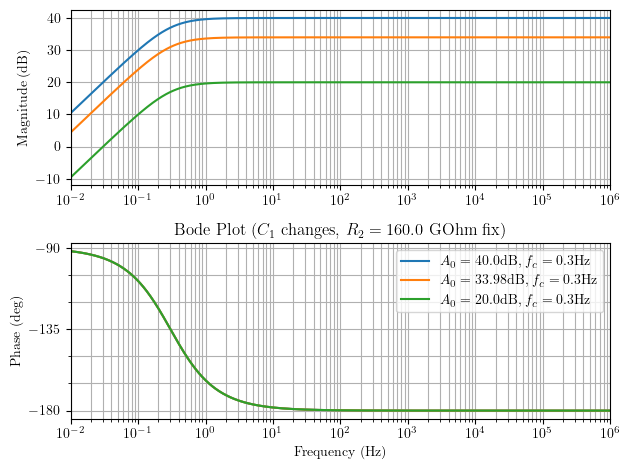

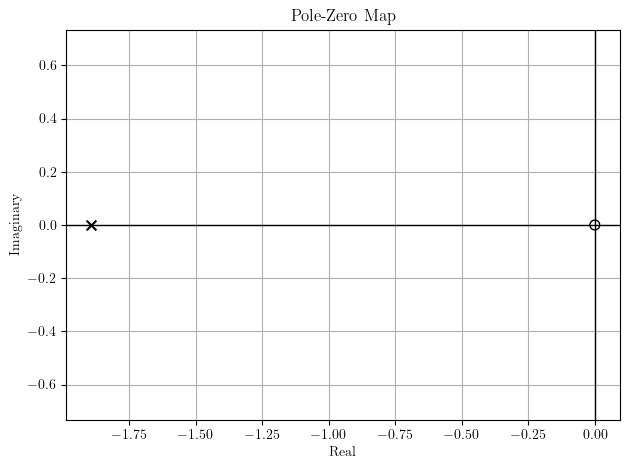

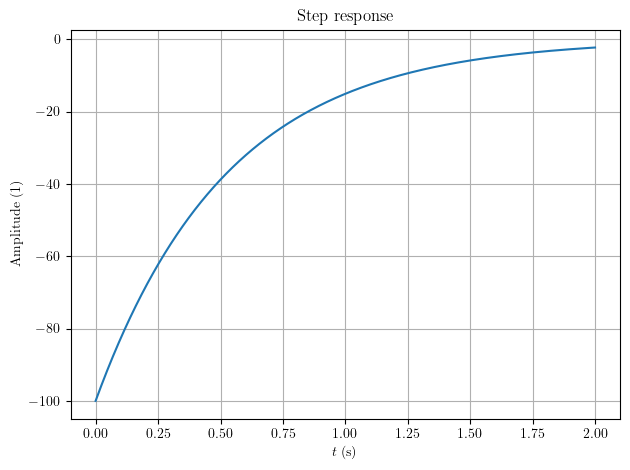

In [38]:
# Plot the simplified transfer function of the Biosignal amplifier for different A_0
f_start = 1e-2
f_end = 1e6
wvec = 2*np.pi*np.logspace(np.log10(f_start), np.log10(f_end), 1001)

# Plot Bode Plot
fig4 = plt.figure(tight_layout = True)

# Different A_0 (C_1 changes, R_2 = 160.0 GOhm fix)
b = np.empty((len(C_1), 2))
a = np.empty((len(C_1), 2))
simplified_tf = np.empty(len(C_1), dtype=object)
mag_simplified = np.empty((len(C_1), len(wvec)))
phase_simplified = np.empty((len(C_1), len(wvec)))
wout_simplified = np.empty((len(C_1), len(wvec)))
for i in range(len(C_1)):
  # Simplified transfer function with C_1, C_2 and R_2
  # H(s) = - C_1 / C_2 * (s * R_2 * C_2) / (1 + s R_2 C_2)
  b[i] = np.array([- C_1[i] / C_2 * R_2[1] * C_2, 0])
  a[i] = np.array([R_2[1] * C_2, 1])
  simplified_tf[i] = TransferFunction(b[i], a[i])
  [mag_simplified[i], phase_simplified[i], wout_simplified[i]] = bode(simplified_tf[i], wvec, Hz = True)

  # Save data
  # Convert into Hz, dB and degrees
  wout_simplified[i] = [i / (2 * np.pi) for i in wout_simplified[i]]
  mag_simplified[i] = [mag2db(i) for i in mag_simplified[i]]
  phase_simplified[i] = [math.degrees(i) for i in phase_simplified[i]]

plt.title(f"Bode Plot ($C_1$ changes, $R_2 = {round(float(R_2[1] * 1e-9), 2)}$ GOhm fix)")
plt.legend([f"$A_0 = {A_0_dB[0]}$dB, $f_c = {round(float(f_c2[1]), 2)}$Hz", f"$A_0 = {round(float(A_0_dB[1]), 2)}$dB, $f_c = {round(float(f_c2[1]), 2)}$Hz", f"$A_0 = {A_0_dB[2]}$dB, $f_c = {round(float(f_c2[1]), 2)}$Hz"])
plt.xlim(f_start, f_end)
plt.show(block = False)
fig4.savefig("figures/biosignal_amplifier/biosignal_amplifier_bode_simplified_out_in_A0.svg", bbox_inches='tight')
fig4.savefig("figures/biosignal_amplifier/biosignal_amplifier_bode_simplified_out_in_A0.pdf", bbox_inches='tight')
np.savetxt("figures/biosignal_amplifier/biosignal_amplifier_bode_simplified_out_in_A0.csv", 
           np.column_stack((wout_simplified[0], mag_simplified[0], mag_simplified[1], mag_simplified[2], phase_simplified[0], phase_simplified[1], phase_simplified[2])), comments = "", 
           header = "wout,mag_simplified_0,mag_simplified_1,mag_simplified_2,phase_simplified_0,phase_simplified_1,phase_simplified_2", delimiter = ",")

# Plot Pole-Zero Map for C_1 = 330pF and R_2 = 160GOhm
fig5 = plt.figure(tight_layout = True)
pzmap(simplified_tf[0])
plt.title('Pole-Zero Map')
plt.grid(visible = True)
plt.show(block = False)

# Plot Step response for C_1 = 330pF and R_2 = 160GOhm
plot_step_response(b[0], a[0], t_start = 0, t_stop = 2, t_step = 0.001)

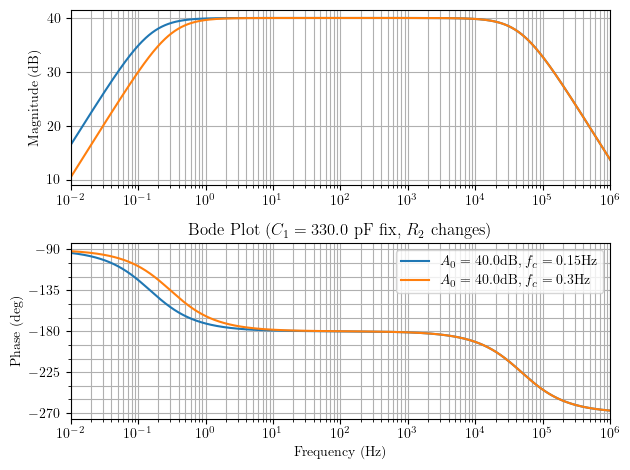

In [39]:
# Plot the transfer function of the Biosignal amplifier for different fc
f_start = 1e-2
f_end = 1e6
wvec = 2*np.pi*np.logspace(np.log10(f_start), np.log10(f_end), 1001)

# Plot Bode Plot
fig6 = plt.figure(tight_layout = True)

# Different fc (C_1 = 330pF fix, R_2 changes)
b = np.empty((len(R_2), 2))
a = np.empty((len(R_2), 3))
total_tf = np.empty(len(R_2), dtype=object)
mag_total = np.empty((len(R_2), len(wvec)))
phase_total = np.empty((len(R_2), len(wvec)))
wout_total = np.empty((len(R_2), len(wvec)))
for i in range(len(R_2)):
  # Total transfer function with C_1, R_1, C_2 and R_2
  # H(s) = - R_2 / R_1 * 1 / (1 + s R_2 C_2) * (s R_1 C_1) / (1 + s R_1 C_1)
  b[i] = np.array([- R_2[i] / R_1 * R_1 * C_1[0], 0])
  a[i] = np.array([R_1 * R_2[i] * C_1[0] * C_2, (R_1 * C_1[0] + R_2[i] * C_2), 1])
  total_tf[i] = TransferFunction(b[i], a[i])
  [mag_total[i], phase_total[i], wout_total[i]] = bode(total_tf[i], wvec, Hz = True)

  # Save data
  # Convert into Hz, dB and degrees
  wout_total[i] = [i / (2 * np.pi) for i in wout_total[i]]
  mag_total[i] = [mag2db(i) for i in mag_total[i]]
  phase_total[i] = [math.degrees(i) for i in phase_total[i]]

plt.title(f"Bode Plot ($C_1 = {round(float(C_1[0] * 1e12), 2)}$ pF fix, $R_2$ changes)")
plt.legend([f"$A_0 = {A_0_dB[0]}$dB, $f_c = {round(float(f_c2[0]), 2)}$Hz", f"$A_0 = {round(float(A_0_dB[0]), 2)}$dB, $f_c = {round(float(f_c2[1]), 2)}$Hz"])
plt.xlim(f_start, f_end)
plt.show(block = False)
fig6.savefig("figures/biosignal_amplifier/biosignal_amplifier_bode_total_out_in_fc.svg", bbox_inches='tight')
fig6.savefig("figures/biosignal_amplifier/biosignal_amplifier_bode_total_out_in_fc.pdf", bbox_inches='tight')
np.savetxt("figures/biosignal_amplifier/biosignal_amplifier_bode_total_out_in_fc.csv", 
           np.column_stack((wout_total[0], mag_total[0], mag_total[1], phase_total[0], phase_total[1])), comments = "", 
           header = "wout,mag_total_0,mag_total_1,phase_total_0,phase_total_1", delimiter = ",")

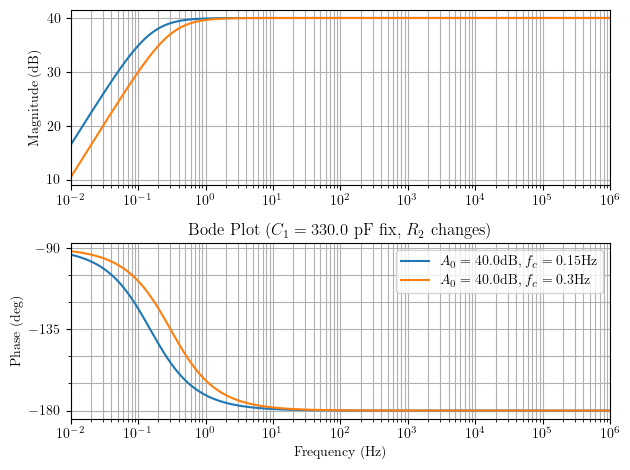

In [40]:
# Plot the simplified transfer function of the Biosignal amplifier for different fc
f_start = 1e-2
f_end = 1e6
wvec = 2*np.pi*np.logspace(np.log10(f_start), np.log10(f_end), 1001)

# Plot Bode Plot
fig7 = plt.figure(tight_layout = True)

# Different fc (C_1 = 330pF fix, R_2 changes)
b = np.empty((len(R_2), 2))
a = np.empty((len(R_2), 2))
simplified_tf = np.empty(len(R_2), dtype=object)
mag_simplified = np.empty((len(R_2), len(wvec)))
phase_simplified = np.empty((len(R_2), len(wvec)))
wout_simplified = np.empty((len(R_2), len(wvec)))
for i in range(len(R_2)):
  # Simplified transfer function with C_1, C_2 and R_2
  # H(s) = - C_1 / C_2 * (s * R_2 * C_2) / (1 + s R_2 C_2)
  b[i] = np.array([- C_1[0] / C_2 * R_2[i] * C_2, 0])
  a[i] = np.array([R_2[i] * C_2, 1])

  simplified_tf[i] = TransferFunction(b[i], a[i])
  [mag_simplified[i], phase_simplified[i], wout_simplified[i]] = bode(simplified_tf[i], wvec, Hz = True)

  # Save data
  # Convert into Hz, dB and degrees
  wout_simplified[i] = [i / (2 * np.pi) for i in wout_simplified[i]]
  mag_simplified[i] = [mag2db(i) for i in mag_simplified[i]]
  phase_simplified[i] = [math.degrees(i) for i in phase_simplified[i]]

plt.title(f"Bode Plot ($C_1 = {round(float(C_1[0] * 1e12), 2)}$ pF fix, $R_2$ changes)")
plt.legend([f"$A_0 = {A_0_dB[0]}$dB, $f_c = {round(float(f_c2[0]), 2)}$Hz", f"$A_0 = {round(float(A_0_dB[0]), 2)}$dB, $f_c = {round(float(f_c2[1]), 2)}$Hz"])
plt.xlim(f_start, f_end)
plt.show(block = False)
fig7.savefig("figures/biosignal_amplifier/biosignal_amplifier_bode_simplified_out_in_fc.svg", bbox_inches='tight')
fig7.savefig("figures/biosignal_amplifier/biosignal_amplifier_bode_simplified_out_in_fc.pdf", bbox_inches='tight')
np.savetxt("figures/biosignal_amplifier/biosignal_amplifier_bode_simplified_out_in_fc.csv", 
           np.column_stack((wout_simplified[0], mag_simplified[0], mag_simplified[1], phase_simplified[0], phase_simplified[1])), comments = "", 
           header = "wout,mag_simplified_0,mag_simplified_1,phase_simplified_0,phase_simplified_1", delimiter = ",")

From now on, we ignore $R_1$ and only work with the simplified transfer function!

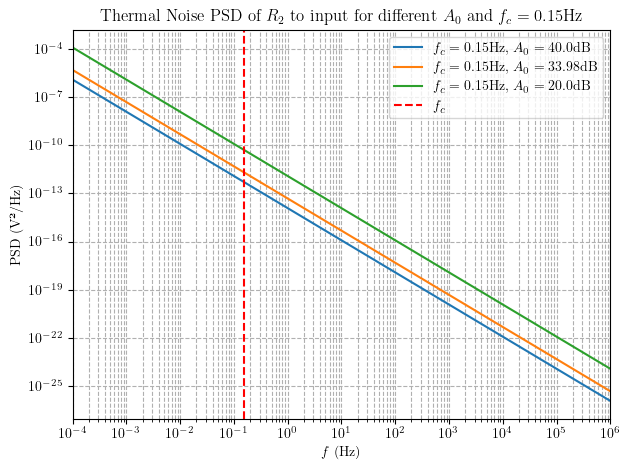

In [41]:
# Calculate and plot input-referred noise coming from the thermal noise of R2 for different A_0, and f_c2 = 0.15
# Vn_sq_R2_in(f) = 4 k T R_2 / (2 pi f R_2 C_1)^2 = 4 k T R_2 / ((f / f_c2)^2 * A_0^2)

# Frequency range (logarithmic scale)
f = np.logspace(-4, 6, 101)

# Compute and plot power spectral density (PSD) of noise for different A_0, and f_c2 = 0.15
fig8 = plt.figure(tight_layout = True)
PSD_R2_in = np.empty((len(C_1), len(f)))
for i in range(len(C_1)):
  PSD_R2_in[i] = noise_spectrum_R2_in(f, T, R_2[0], f_c2[0], A_0[i])
  plt.plot(f, PSD_R2_in[i], label=f"$f_c = {f_c2[0]:.2f}$Hz, $A_0 = {round(float(A_0_dB[i]), 2)}$dB")
plt.axvline(f_c2[0], color='r', linestyle='--', label="$f_c$")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("$f$ (Hz)")
plt.ylabel("PSD (V²/Hz)")
plt.title(f"Thermal Noise PSD of $R_2$ to input for different $A_0$ and $f_c = {f_c2[0]:.2f}$Hz")
plt.legend()
plt.grid(True, which = "both", linestyle = "--")
plt.xlim(1e-4, 1e6)
plt.show()
fig8.savefig("figures/biosignal_amplifier/biosignal_amplifier_PSD_R2_in_A0.svg", bbox_inches='tight')
fig8.savefig("figures/biosignal_amplifier/biosignal_amplifier_PSD_R2_in_A0.pdf", bbox_inches='tight')

np.savetxt(f"figures/biosignal_amplifier/biosignal_amplifier_PSD_R2_in_A0.csv", 
           np.column_stack((f, PSD_R2_in[0], PSD_R2_in[1], PSD_R2_in[2])), comments = "", 
           header = "f,PSD_R2_in_0,PSD_R2_in_1,PSD_R2_in_2", delimiter = ",")

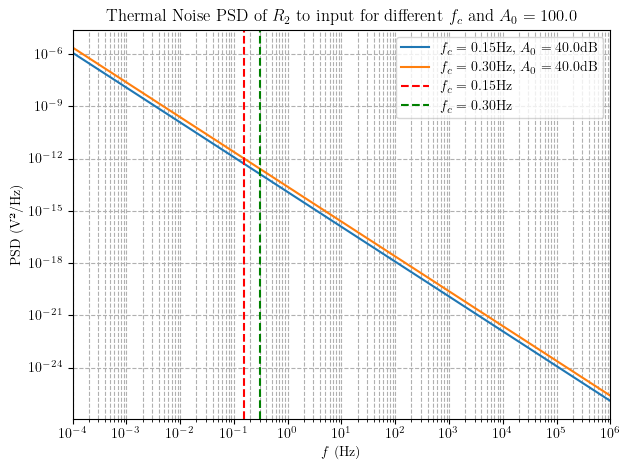

In [42]:
# Calculate and plot input-referred noise coming from the thermal noise of R2 for different f_c2, and A_0 = 100
# Vn_sq_R2_in(f) = 4 k T R_2 / (2 pi f R_2 C_1)^2 = 4 k T R_2 / ((f / f_c2)^2 * A_0^2)

# Frequency range (logarithmic scale)
f = np.logspace(-4, 6, 101)

# Compute and plot power spectral density (PSD) of noise for different f_c2, and A_0 = 100
fig9 = plt.figure(tight_layout = True)
PSD_R2_in = np.empty((len(R_2), len(f)))
for i in range(len(R_2)):
  PSD_R2_in[i] = noise_spectrum_R2_in(f, T, R_2[i], f_c2[i], A_0[0])
  plt.plot(f, PSD_R2_in[i], label=f"$f_c = {f_c2[i]:.2f}$Hz, $A_0 = {round(float(A_0_dB[0]), 2)}$dB")

plt.axvline(f_c2[0], color='r', linestyle='--', label=f"$f_c = {f_c2[0]:.2f}$Hz")
plt.axvline(f_c2[1], color='g', linestyle='--', label=f"$f_c = {f_c2[1]:.2f}$Hz")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("$f$ (Hz)")
plt.ylabel("PSD (V²/Hz)")
plt.title(f"Thermal Noise PSD of $R_2$ to input for different $f_c$ and $A_0 = {A_0[0]}$")
plt.legend()
plt.grid(True, which = "both", linestyle = "--")
plt.xlim(1e-4, 1e6)
plt.show()
fig9.savefig("figures/biosignal_amplifier/biosignal_amplifier_PSD_R2_in_fc.svg", bbox_inches='tight')
fig9.savefig("figures/biosignal_amplifier/biosignal_amplifier_PSD_R2_in_fc.pdf", bbox_inches='tight')
np.savetxt(f"figures/biosignal_amplifier/biosignal_amplifier_PSD_R2_in_fc.csv", 
           np.column_stack((f, PSD_R2_in[0], PSD_R2_in[1])), comments = "", 
           header = "f,PSD_R2_in_0,PSD_R2_in_1", delimiter = ",")

In [43]:
# Compute total input-referred noise coming from the thermal noise of R2 in Vrms
# f_c = 0.15Hz (R_2 = 320GOhm)
print(f"f_c = {round(float(f_c2[0]), 2)} Hz (R_2 = {round(float(R_2[0] * 1e-9), 2)}GOhm) for different A_0:")
print("Numpy Integral:")
for i in range(len(C_1)):
  V_rms_squared, _ = sci.quad(noise_spectrum_R2_in, f_c2[0], B, args=(T, R_2[0], f_c2[0], A_0[i])) # 0.15Hz to B
  V_rms = np.sqrt(V_rms_squared)
  print(f"RMS Noise Voltage from R_2 to the input from {round(float(f_c2[0]), 2)} Hz (R_2 = {round(float(R_2[0] * 1e-9), 2)}GOhm) to {B} Hz and A_0 = {A_0[i]} equals {round(float(V_rms * 1e6), 4)} uVrms")

print('')

print("Analytical Formula:")
for i in range(len(C_1)):
  V_rms_squared = (sc.k * T / C_1[i]) * (1 / (np.pi**2 * R_2[0] * C_1[i])) * (1 / f_c2[0] - 1 / B) # 0.15Hz o B
  V_rms = np.sqrt(V_rms_squared)
  print(f"RMS Noise Voltage from R_2 to the input from {round(float(f_c2[0]), 2)} Hz (R_2 = {round(float(R_2[0] * 1e-9), 2)}GOhm) to {B} Hz and A_0 = {A_0[i]} equals {round(float(V_rms * 1e6), 4)} uVrms")
print("================================================================================================================== \n")

# f_c = 0.30Hz (R_2 = 160GOhm)
print(f"f_c = {round(float(f_c2[1]), 2)} Hz (R_2 = {round(float(R_2[1] * 1e-9), 2)}GOhm) for different A_0:")
print("Numpy Integral:")
for i in range(len(C_1)):
  V_rms_squared, _ = sci.quad(noise_spectrum_R2_in, f_c2[1], B, args=(T, R_2[1], f_c2[1], A_0[i])) # 0.30Hz to B
  V_rms = np.sqrt(V_rms_squared)
  print(f"RMS Noise Voltage from R_2 to the input from {round(float(f_c2[1]), 2)} Hz (R_2 = {round(float(R_2[1] * 1e-9), 2)}GOhm) to {B} Hz and A_0 = {A_0[i]} equals {round(float(V_rms * 1e6), 4)} uVrms")

print('')

print("Analytical Formula:")
for i in range(len(C_1)):
  V_rms_squared = (sc.k * T / C_1[i]) * (1 / (np.pi**2 * R_2[1] * C_1[i])) * (1 / f_c2[1] - 1 / B) # 0.30Hz to B
  V_rms = np.sqrt(V_rms_squared)
  print(f"RMS Noise Voltage from R_2 to the input from {round(float(f_c2[0]), 2)} Hz (R_2 = {round(float(R_2[1] * 1e-9), 2)}GOhm) to {B} Hz and A_0 = {A_0[i]} equals {round(float(V_rms * 1e6), 4)} uVrms")
print("================================================================================================================== \n")

f_c = 0.15 Hz (R_2 = 320.0GOhm) for different A_0:
Numpy Integral:
RMS Noise Voltage from R_2 to the input from 0.15 Hz (R_2 = 320.0GOhm) to 500 Hz and A_0 = 100.0 equals 0.2068 uVrms
RMS Noise Voltage from R_2 to the input from 0.15 Hz (R_2 = 320.0GOhm) to 500 Hz and A_0 = 50.0 equals 0.4136 uVrms
RMS Noise Voltage from R_2 to the input from 0.15 Hz (R_2 = 320.0GOhm) to 500 Hz and A_0 = 10.0 equals 2.068 uVrms

Analytical Formula:
RMS Noise Voltage from R_2 to the input from 0.15 Hz (R_2 = 320.0GOhm) to 500 Hz and A_0 = 100.0 equals 0.2826 uVrms
RMS Noise Voltage from R_2 to the input from 0.15 Hz (R_2 = 320.0GOhm) to 500 Hz and A_0 = 50.0 equals 0.5653 uVrms
RMS Noise Voltage from R_2 to the input from 0.15 Hz (R_2 = 320.0GOhm) to 500 Hz and A_0 = 10.0 equals 2.8263 uVrms

f_c = 0.3 Hz (R_2 = 160.0GOhm) for different A_0:
Numpy Integral:
RMS Noise Voltage from R_2 to the input from 0.3 Hz (R_2 = 160.0GOhm) to 500 Hz and A_0 = 100.0 equals 0.2469 uVrms
RMS Noise Voltage from R_2 to th

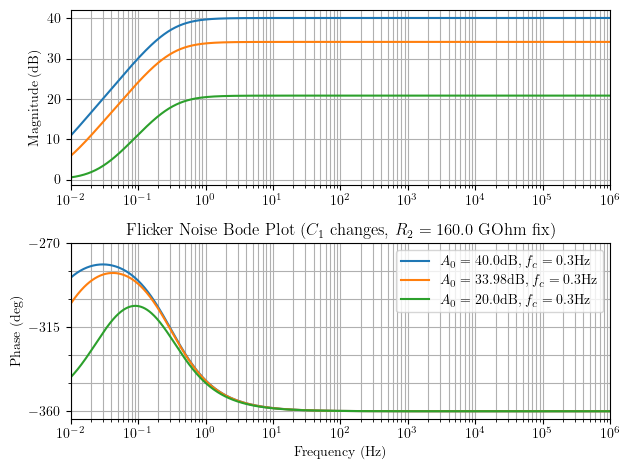

In [44]:
# Plot the transfer function of the flicker noise to output for different A_0
f_start = 1e-2
f_end = 1e6
wvec = 2*np.pi*np.logspace(np.log10(f_start), np.log10(f_end), 1001)

# Plot Bode Plot
fig10 = plt.figure(tight_layout = True)

# Different A_0 (C_1 changes, R_2 = 160.0 GOhm fix)
b = np.empty((len(C_1), 2))
a = np.empty((len(C_1), 2))
flicker_tf = np.empty(len(C_1), dtype=object)
mag_flicker = np.empty((len(C_1), len(wvec)))
phase_flicker = np.empty((len(C_1), len(wvec)))
wout_flicker = np.empty((len(C_1), len(wvec)))
for i in range(len(C_1)):
  # Flicker noise transfer function with C_1, C_2 and R_2
  # H(s) = (1 + s (C_1 + C_2) R_2) / (1 + s C_2 R_2)
  b[i] = np.array([(C_1[i] + C_2) * R_2[1], 1])
  a[i] = np.array([R_2[1] * C_2, 1])
  flicker_tf[i] = TransferFunction(b[i], a[i])
  [mag_flicker[i], phase_flicker[i], wout_flicker[i]] = bode(flicker_tf[i], wvec, Hz = True)

  # Save data
  # Convert into Hz, dB and degrees
  wout_flicker[i] = [i / (2 * np.pi) for i in wout_flicker[i]]
  mag_flicker[i] = [mag2db(i) for i in mag_flicker[i]]
  phase_flicker[i] = [math.degrees(i) for i in phase_flicker[i]]

plt.title(f"Flicker Noise Bode Plot ($C_1$ changes, $R_2 = {round(float(R_2[1] * 1e-9), 2)}$ GOhm fix)")
plt.legend([f"$A_0 = {A_0_dB[0]}$dB, $f_c = {round(float(f_c2[1]), 2)}$Hz", f"$A_0 = {round(float(A_0_dB[1]), 2)}$dB, $f_c = {round(float(f_c2[1]), 2)}$Hz", f"$A_0 = {A_0_dB[2]}$dB, $f_c = {round(float(f_c2[1]), 2)}$Hz"])
plt.xlim(f_start, f_end)
plt.show(block = False)
fig10.savefig("figures/biosignal_amplifier/biosignal_amplifier_bode_vout_flicker_A0.svg", bbox_inches='tight')
fig10.savefig("figures/biosignal_amplifier/biosignal_amplifier_bode_vout_flicker_A0.pdf", bbox_inches='tight')
np.savetxt("figures/biosignal_amplifier/biosignal_amplifier_bode_vout_flicker_A0.csv", 
           np.column_stack((wout_flicker[0], mag_flicker[0], mag_flicker[1], mag_flicker[2], phase_flicker[0], phase_flicker[1], phase_flicker[2])), comments = "", 
           header = "wout,mag_flicker_0,mag_flicker_1,mag_flicker_2,phase_flicker_0,phase_flicker_1,phase_flicker_2", delimiter = ",")

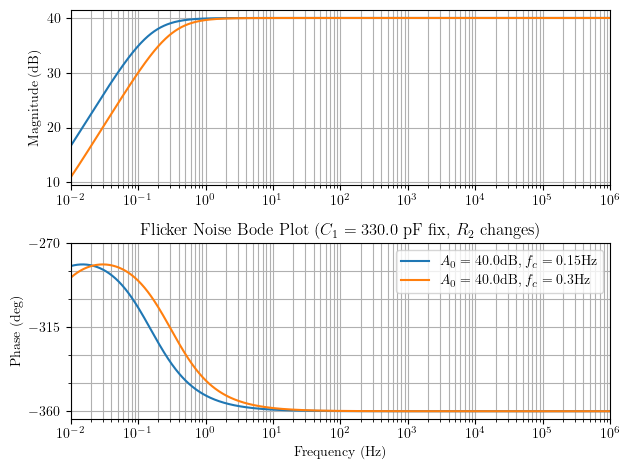

In [45]:
# Plot the transfer function of the flicker noise to output for different f_c
f_start = 1e-2
f_end = 1e6
wvec = 2*np.pi*np.logspace(np.log10(f_start), np.log10(f_end), 1001)

# Plot Bode Plot
fig11 = plt.figure(tight_layout = True)

# Different fc (C_1 = 330pF fix, R_2 changes)
b = np.empty((len(R_2), 2))
a = np.empty((len(R_2), 2))
flicker_tf = np.empty(len(R_2), dtype=object)
mag_flicker = np.empty((len(R_2), len(wvec)))
phase_flicker = np.empty((len(R_2), len(wvec)))
wout_flicker = np.empty((len(R_2), len(wvec)))
for i in range(len(R_2)):
  # Flicker noise transfer function with C_1, C_2 and R_2
  # H(s) = (1 + s (C_1 + C_2) R_2) / (1 + s C_2 R_2)
  b[i] = np.array([(C_1[0] + C_2) * R_2[i], 1])
  a[i] = np.array([R_2[i] * C_2, 1])
  flicker_tf[i] = TransferFunction(b[i], a[i])
  [mag_flicker[i], phase_flicker[i], wout_flicker[i]] = bode(flicker_tf[i], wvec, Hz = True)

  # Save data
  # Convert into Hz, dB and degrees
  wout_flicker[i] = [i / (2 * np.pi) for i in wout_flicker[i]]
  mag_flicker[i] = [mag2db(i) for i in mag_flicker[i]]
  phase_flicker[i] = [math.degrees(i) for i in phase_flicker[i]]

plt.title(f"Flicker Noise Bode Plot ($C_1 = {round(float(C_1[0] * 1e12), 2)}$ pF fix, $R_2$ changes)")
plt.legend([f"$A_0 = {A_0_dB[0]}$dB, $f_c = {round(float(f_c2[0]), 2)}$Hz", f"$A_0 = {round(float(A_0_dB[0]), 2)}$dB, $f_c = {round(float(f_c2[1]), 2)}$Hz"])
plt.xlim(f_start, f_end)
plt.show(block = False)
fig11.savefig("figures/biosignal_amplifier/biosignal_amplifier_bode_vout_flicker_fc.svg", bbox_inches='tight')
fig11.savefig("figures/biosignal_amplifier/biosignal_amplifier_bode_vout_flicker_fc.pdf", bbox_inches='tight')
np.savetxt("figures/biosignal_amplifier/biosignal_amplifier_bode_vout_flicker_fc.csv", 
           np.column_stack((wout_flicker[0], mag_flicker[0], mag_flicker[1], phase_flicker[0], phase_flicker[1])), comments = "", 
           header = "wout,mag_flicker_0,mag_flicker_1,phase_flicker_0,phase_flicker_1", delimiter = ",")

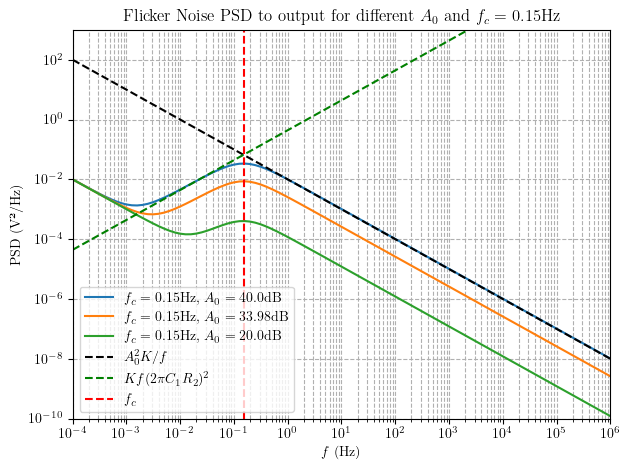

In [46]:
# Calculate and plot output-referred noise coming from the flicker noise of the OTA for different A_0, and f_c2 = 0.15
# Vn_sq_flicker_out(f) = K / f * (1 + f**2 * (2 * np.pi * C_1 * R_2)**2) / (1 + f**2 * (2 * np.pi * C_2 * R_2)**2)

# Frequency range (logarithmic scale)
f = np.logspace(-4, 6, 101)

# Flicker noise is modelled as S_flicker = K / f
# K is the flicker noise spectral density at f = 1Hz
# Since we just want to see the characteristic of the curve and not the total rms voltage, this can be set to 1.
# Alternatively, one can simulate this value in Xschem.
K = 1e-6

# Plotting additional functions
PSD_flicker_1 = (A_0[0])**2 * K / f
PSD_flicker_2 = K * f * (2 * np.pi * C_1[0] * R_2[0])**2

# Compute and plot power spectral density (PSD) of noise for different A_0, and f_c2 = 0.15
fig12 = plt.figure(tight_layout = True)
PSD_flicker_out = np.empty((len(C_1), len(f)))
for i in range(len(C_1)):
  PSD_flicker_out[i] = noise_spectrum_flicker_out(f, K, C_1[i], C_2, R_2[0])
  plt.plot(f, PSD_flicker_out[i], label=f"$f_c = {f_c2[0]:.2f}$Hz, $A_0 = {round(float(A_0_dB[i]), 2)}$dB")
plt.plot(f, PSD_flicker_1, label=f"$A_0^2 K / f$", color='k', linestyle='--')
plt.plot(f, PSD_flicker_2, label=f"$K f (2 \pi C_1 R_2)^2$", color='g', linestyle='--')
plt.axvline(f_c2[0], color='r', linestyle='--', label="$f_c$")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("$f$ (Hz)")
plt.ylabel("PSD (V²/Hz)")
plt.title(f"Flicker Noise PSD to output for different $A_0$ and $f_c = {f_c2[0]:.2f}$Hz")
plt.legend()
plt.grid(True, which = "both", linestyle = "--")
plt.xlim(1e-4, 1e6)
plt.ylim(1e-10, 1e3)
plt.show()
fig12.savefig("figures/biosignal_amplifier/biosignal_amplifier_PSD_flicker_out_A0.svg", bbox_inches='tight')
fig12.savefig("figures/biosignal_amplifier/biosignal_amplifier_PSD_flicker_out_A0.pdf", bbox_inches='tight')

np.savetxt(f"figures/biosignal_amplifier/biosignal_amplifier_PSD_flicker_out_A0.csv", 
           np.column_stack((f, PSD_flicker_out[0], PSD_flicker_out[1], PSD_flicker_out[2], PSD_flicker_1, PSD_flicker_2)), comments = "", 
           header = "f,PSD_flicker_out_0,PSD_flicker_out_1,PSD_flicker_out_2,PSD_flicker_1,PSD_flicker_2", delimiter = ",")


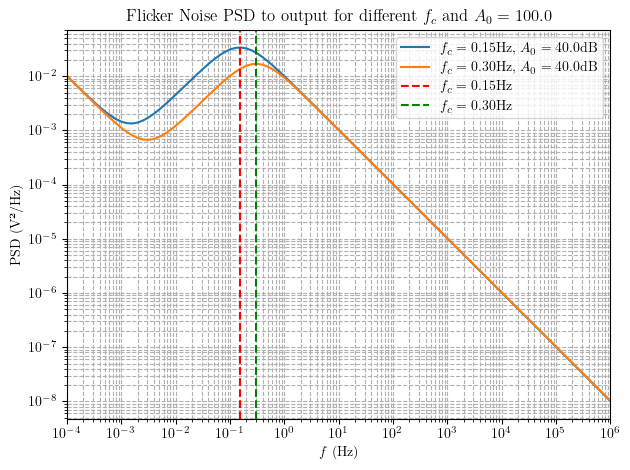

<Figure size 640x480 with 0 Axes>

In [47]:
# Calculate and plot output-referred noise coming from the flicker noise of the OTA for different f_c2, and A_0 = 100
# Vn_sq_flicker_out(f) = K / f * (1 + f**2 * (2 * np.pi * C_1 * R_2)**2) / (1 + f**2 * (2 * np.pi * C_2 * R_2)**2)

# Frequency range (logarithmic scale)
f = np.logspace(-4, 6, 101)

# Flicker noise is modelled as S_flicker = K / f
# K is the flicker noise of the input of the OTA at 1Hz (at 1Ohm load) in V².
# Since we just want to see the characteristic of the curve and not the total rms voltage, this can be set to a number.
# Alternatively, one can simulate this value in Xschem (ToDo).
K = 1e-6

# Compute and plot power spectral density (PSD) of noise for different f_c2, and A_0 = 100
fig13 = plt.figure(tight_layout = True)
PSD_flicker_out = np.empty((len(R_2), len(f)))
for i in range(len(R_2)):
  PSD_flicker_out[i] = noise_spectrum_flicker_out(f, K, C_1[0], C_2, R_2[i])
  plt.plot(f, PSD_flicker_out[i], label=f"$f_c = {f_c2[i]:.2f}$Hz, $A_0 = {round(float(A_0_dB[0]), 2)}$dB")
plt.axvline(f_c2[0], color='r', linestyle='--', label=f"$f_c = {f_c2[0]:.2f}$Hz")
plt.axvline(f_c2[1], color='g', linestyle='--', label=f"$f_c = {f_c2[1]:.2f}$Hz")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("$f$ (Hz)")
plt.ylabel("PSD (V²/Hz)")
plt.title(f"Flicker Noise PSD to output for different $f_c$ and $A_0 = {A_0[0]}$")
plt.legend()
plt.grid(True, which = "both", linestyle = "--")
plt.xlim(1e-4, 1e6)
plt.show()
fig13 = plt.savefig("figures/biosignal_amplifier/biosignal_amplifier_PSD_flicker_out_fc.svg", bbox_inches='tight')
fig13 = plt.savefig("figures/biosignal_amplifier/biosignal_amplifier_PSD_flicker_out_fc.pdf", bbox_inches='tight')

np.savetxt(f"figures/biosignal_amplifier/biosignal_amplifier_PSD_flicker_out_fc.csv", 
           np.column_stack((f, PSD_R2_in[0], PSD_R2_in[1])), comments = "", 
           header = "f,PSD_R2_in_0,PSD_R2_in_1", delimiter = ",")

In [48]:
# Compute total output-referred noise coming from the flicker noise of the OTA in Vrms

# Flicker noise is modelled as S_flicker = K / f
# K is the flicker noise of the input of the OTA at 1Hz (at 1Ohm load) in V².
# Since we just want to see the characteristic of the curve and not the total rms voltage, this can be set to a number.
# Alternatively, one can simulate this value in Xschem (ToDo).
K = 1e-6

# f_c = 0.15Hz (R_2 = 320GOhm)
for i in range(len(C_1)):
  V_rms_squared, _ = sci.quad(noise_spectrum_flicker_out, f_c2[0], B, args=(K, C_1[i], C_2, R_2[0])) # 0.15Hz to B
  V_rms = np.sqrt(V_rms_squared)
  print(f"RMS Flicker Noise Voltage to the output from {round(float(f_c2[0]), 2)} Hz (R_2 = {round(float(R_2[0] * 1e-9), 2)}GOhm) to {B} Hz and A_0 = {A_0[i]} equals {round(float(V_rms * 1e6), 2)} uVrms")

print('')

# f_c = 0.30Hz (R_2 = 160GOhm)
for i in range(len(C_1)):
  V_rms_squared, _ = sci.quad(noise_spectrum_flicker_out, f_c2[1], B, args=(K, C_1[i], C_2, R_2[1])) # 0.30Hz to B
  V_rms = np.sqrt(V_rms_squared)
  print(f"RMS Flicker Noise Voltage to the output from {round(float(f_c2[1]), 2)} Hz (R_2 = {round(float(R_2[1] * 1e-9), 2)}GOhm) to {B} Hz and A_0 = {A_0[i]} equals {round(float(V_rms * 1e6), 2)} uVrms")

RMS Flicker Noise Voltage to the output from 0.15 Hz (R_2 = 320.0GOhm) to 500 Hz and A_0 = 100.0 equals 281361.31 uVrms
RMS Flicker Noise Voltage to the output from 0.15 Hz (R_2 = 320.0GOhm) to 500 Hz and A_0 = 50.0 equals 142074.44 uVrms
RMS Flicker Noise Voltage to the output from 0.15 Hz (R_2 = 320.0GOhm) to 500 Hz and A_0 = 10.0 equals 30648.9 uVrms

RMS Flicker Noise Voltage to the output from 0.3 Hz (R_2 = 160.0GOhm) to 500 Hz and A_0 = 100.0 equals 268502.13 uVrms
RMS Flicker Noise Voltage to the output from 0.3 Hz (R_2 = 160.0GOhm) to 500 Hz and A_0 = 50.0 equals 135581.23 uVrms
RMS Flicker Noise Voltage to the output from 0.3 Hz (R_2 = 160.0GOhm) to 500 Hz and A_0 = 10.0 equals 29248.66 uVrms


Simulation with idealized CMFBs (R_1_CMFB / R_2_CMFB) and bias circuit v2

In [ ]:
# Print out final design values
# These results depend greatly on ngspice settings (reltol, abstol, gmin, rshunt, optran, etc.) and therefore must be interpreted carefully.
print('Bio-signal amplifier performance summary:')
print('-----------------------------------------------')
print('C_1 =', round(float(C_1[0]) * 1e12, 2), 'pF, R_2 =', round(float(R_2[1]) * 1e-9, 2), 'GOhm:')
print('-----------------------------------------------')
print('Vcm_out =', round(float(0.739), 3), 'V')
print('A_cl_0 =', round(float(39.86), 2), 'dB with R_1_CMFB = R_2_CMFB')
print('f_cl =', round(float(0.303), 2), 'Hz with R_1_CMFB = R_2_CMFB')
print('f_cu =', round(float(4.78), 2), 'kHz with R_1_CMFB = R_2_CMFB')
print('Phase Margin =', round(float(88.10), 2), '°')
print('CMRR =', round(float(95.17), 2), 'dB @ 10Hz with R_1_CMFB = R_2_CMFB')
print('Zin_CM =', round(float(112.55), 2), 'MOhm @ 10Hz with R_1_CMFB = R_2_CMFB')
print('Zin_DM =', round(float(127), 2), 'kOhm @ 10Hz with R_1_CMFB = R_2_CMFB')
print('Zin_DM =', round(float(2.10), 2), 'MOhm @ 1Hz with R_1_CMFB = R_2_CMFB')
print('input-referred noise from 0.15 to', round(B, 2), 'Hz =', round(float(8.79), 2), 'uVrms') # R2 = 320G
print('output-referred noise from 0.15 to', round(B, 2), 'Hz =', round(float(785), 2), 'uVrms') # R2 = 320G
print('input-referred noise from 0.30 to', round(B, 2), 'Hz =', round(float(6.78), 2), 'uVrms')
print('output-referred noise from 0.30 to', round(B, 2), 'Hz =', round(float(618), 2), 'uVrms')
print('rising and falling slewing time ~', round(15, 2), 'us \n')
print('-----------------------------------------------')

print('C_1 =', round(float(C_1[1]) * 1e12, 2), 'pF, R_2 =', round(float(R_2[1]) * 1e-9, 2), 'GOhm:')
print('-----------------------------------------------')
print('Vcm_out =', round(float(0.739), 3), 'V')
print('A_cl_0 =', round(float(33.91), 2), 'dB with R_1_CMFB = R_2_CMFB')
print('f_cl =', round(float(0.305), 2), 'Hz with R_1_CMFB = R_2_CMFB')
print('f_cu =', round(float(9.79), 2), 'kHz with R_1_CMFB = R_2_CMFB')
print('Phase Margin =', round(float(85.16), 2), '°')
print('CMRR =', round(float(89.30), 2), 'dB @ 10Hz with R_1_CMFB = R_2_CMFB')
print('Zin_CM =', round(float(112.65), 2), 'MOhm @ 10Hz with R_1_CMFB = R_2_CMFB')
print('Zin_DM =', round(float(127), 2), 'kOhm @ 10Hz with R_1_CMFB = R_2_CMFB')
print('Zin_DM =', round(float(2.10), 2), 'MOhm @ 1Hz with R_1_CMFB = R_2_CMFB')
print('input-referred noise from 0.15 to', round(B, 2), 'Hz =', round(float(15.83), 2), 'uVrms')  # R2 = 320G
print('output-referred noise from 0.15 to', round(B, 2), 'Hz =', round(float(696), 2), 'uVrms')   # R2 = 320G
print('input-referred noise from 0.30 to', round(B, 2), 'Hz =', round(float(11.35), 2), 'uVrms')
print('output-referred noise from 0.30 to', round(B, 2), 'Hz =', round(float(506), 2), 'uVrms')
print('rising and falling slewing time ~', round(15, 2), 'us \n')
print('-----------------------------------------------')

print('C_1 =', round(float(C_1[2]) * 1e12, 2), 'pF, R_2 =', round(float(R_2[1]) * 1e-9, 2), 'GOhm:')
print('-----------------------------------------------')
print('Vcm_out =', round(float(0.739), 3), 'V')
print('A_cl_0 =', round(float(19.98), 2), 'dB with R_1_CMFB = R_2_CMFB')
print('f_cl =', round(float(0.307), 2), 'Hz with R_1_CMFB = R_2_CMFB')
print('f_cu =', round(float(92.79), 2), 'kHz with R_1_CMFB = R_2_CMFB')
print('Phase Margin =', round(float(65.01), 2), '°')
print('CMRR =', round(float(76.01), 2), 'dB @ 10Hz with R_1_CMFB = R_2_CMFB')
print('Zin_CM =', round(float(113.75), 2), 'MOhm @ 10Hz with R_1_CMFB = R_2_CMFB')
print('Zin_DM =', round(float(127), 2), 'kOhm @ 10Hz with R_1_CMFB = R_2_CMFB')
print('Zin_DM =', round(float(2.10), 2), 'MOhm @ 1Hz with R_1_CMFB = R_2_CMFB')
print('input-referred noise from 0.15 to', round(B, 2), 'Hz =', round(float(75.94), 2), 'uVrms')  # R2 = 320G
print('output-referred noise from 0.15 to', round(B, 2), 'Hz =', round(float(664), 2), 'uVrms')   # R2 = 320G
print('input-referred noise from 0.30 to', round(B, 2), 'Hz =', round(float(52.52), 2), 'uVrms')
print('output-referred noise from 0.30 to', round(B, 2), 'Hz =', round(float(463), 2), 'uVrms')
print('rising and falling slewing time ~', round(15, 2), 'us')
print('-----------------------------------------------')

Bio-signal amplifier performance summary:
-----------------------------------------------
C_1 = 330.0 pF, R_2 = 160.0 GOhm:
-----------------------------------------------
Vcm_out = 0.739 V
A_cl_0 = 39.86 dB with R_1_CMFB = R_2_CMFB
f_cl = 0.3 Hz with R_1_CMFB = R_2_CMFB
f_cu = 4.77 kHz with R_1_CMFB = R_2_CMFB
Phase Margin = 88.1 °
CMRR = 95.17 dB @ 10Hz with R_1_CMFB = R_2_CMFB
Zin_CM = 112.46 MOhm @ 10Hz with R_1_CMFB = R_2_CMFB
Zin_DM = 4.7 MOhm @ 10Hz with R_1_CMFB = R_2_CMFB
input-referred noise from 0.15 to 500 Hz = 8.79 uVrms
output-referred noise from 0.15 to 500 Hz = 785.0 uVrms
input-referred noise from 0.30 to 500 Hz = 6.78 uVrms
output-referred noise from 0.30 to 500 Hz = 618.0 uVrms
rising and falling slewing time ~ 15 us 

-----------------------------------------------
C_1 = 165.0 pF, R_2 = 160.0 GOhm:
-----------------------------------------------
Vcm_out = 0.739 V
A_cl_0 = 33.91 dB with R_1_CMFB = R_2_CMFB
f_cl = 0.31 Hz with R_1_CMFB = R_2_CMFB
f_cu = 9.8 kHz with R

Simulation with SC CMFBs and bias circuit v4

In [50]:
# Bio-signal amplifier with SC circuits is successfully simulated using transient analysis.